In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import statistics
from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.lines import Line2D

# Setup

In [2]:
typeIndexResultFile = "./data/type_index_result.json"
shapeIndexResultFile = "./data/shape_index_result.json"

typeIndexSummaryResultFile = "./data/summary_type_index_result.json"
shapeIndexSummaryResultFile = "./data/summary_shape_index_result.json"

In [3]:
typeIndexResult = None
shapeIndexResult = None

typeIndexSummaryResult = None
shapeIndexSummaryResult = None

In [4]:
with open(typeIndexResultFile, 'rb') as rf:
    typeIndexResult = json.load(rf)
    
with open(shapeIndexResultFile, 'rb') as rf:
    shapeIndexResult = json.load(rf)

with open(typeIndexSummaryResultFile, 'rb') as rf:
    typeIndexSummaryResult = json.load(rf)
    
with open(shapeIndexSummaryResultFile, 'rb') as rf:
    shapeIndexSummaryResult = json.load(rf)

In [5]:
executionTimeTypeIndex = {}
executionTimeShapeIndex = {}

elementWithNotIdenticalResult = []

meanExecutionTimeTypeIndex = {}
meanExecutionTimeShapeIndex = {}

numberHttpRequestTypeIndex = {}
numberHttpRequestShapeIndex = {}

In [6]:
for queryName, versionData in typeIndexResult["data"].items():
    executionTimeTypeIndex[queryName] = {}
    executionTimeShapeIndex[queryName] = {}
    for version, repetitionData in versionData.items():
        executionTimeTypeIndex[queryName][version] = []
        executionTimeShapeIndex[queryName][version] = []
        for i, repetition in enumerate(repetitionData):
            if(type(repetition)!=str):
                setResultTypeIndex = {e for l in repetition['results'] for e in l}
                setResultShapeIndex = {e for l in shapeIndexResult["data"][queryName][version][i]['results'] for e in l}
                
                executionTimeTypeIndex[queryName][version].append(repetition['execution_time'])
                executionTimeShapeIndex[queryName][version].append(shapeIndexResult["data"][queryName][version][i]['execution_time'])
                
                # Validate that the results are the same
                if setResultTypeIndex!= setResultShapeIndex :
                    elementWithNotIdenticalResult.append([queryName, version, i])
            else:
                executionTimeTypeIndex[queryName][version].append(-1)
                    
for queryName, versionData in shapeIndexResult["data"].items():
    executionTimeShapeIndex[queryName] = {}
    for version, repetitionData in versionData.items():
        executionTimeShapeIndex[queryName][version] = []
        for i, repetition in enumerate(repetitionData):
            if(type(repetition)!=str):
                executionTimeShapeIndex[queryName][version].append(shapeIndexResult["data"][queryName][version][i]['execution_time'])
            else:
                executionTimeShapeIndex[queryName][version].append(-1)

In [7]:
for queryName, versionData in shapeIndexSummaryResult.items():
    meanExecutionTimeShapeIndex[queryName] = []
    numberHttpRequestShapeIndex[queryName] = []
    for version, data in versionData.items():
        for field, value in data.items():
            if field=="timeout":
                meanExecutionTimeShapeIndex[queryName].append(-1)
                numberHttpRequestShapeIndex[queryName].append(-1)
            if field=="n_http_requests":
                numberHttpRequestShapeIndex[queryName].append(value)
            if field=="execution_time":
                meanExecutionTimeShapeIndex[queryName].append(value["average"])

for queryName, versionData in typeIndexSummaryResult.items():
    meanExecutionTimeTypeIndex[queryName] = []
    numberHttpRequestTypeIndex[queryName] = []
    for version, data in versionData.items():
        for field, value in data.items():
            if field=="timeout":
                meanExecutionTimeTypeIndex[queryName].append(-1)
                numberHttpRequestTypeIndex[queryName].append(-1)
            if field=="n_http_requests":
                numberHttpRequestTypeIndex[queryName].append(value)
            if field=="execution_time":
                meanExecutionTimeTypeIndex[queryName].append(value["average"])
                

In [8]:
print("The none identical results are the following: {}".format(elementWithNotIdenticalResult))

The none identical results are the following: []


# Query execution time

In [9]:
def colorViolon(part, color):  
    for pc in part['bodies']:
        pc.set_color(color)
        pc.set_edgecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(0.75)
    part['cmeans'].set_color('black')
    part['cmins'].set_color('black')
    part['cmaxes'].set_color('black')
    part['cbars'].set_color('black')
    part['cmedians'].set_color('black')

## Single plot

###  Util

In [37]:
def plotOneQueryExecutionTime(queryName, queryLabelTemplate):
    indexes = np.linspace(0, 0.25, 5)
    yaxisIndexes = np.arange(0, 2500, 500)
    
    allDataShapeIndex = [data for label,data in executionTimeShapeIndex[queryName].items()]
    allDataTypeIndex = [data for label,data in executionTimeTypeIndex[queryName].items()]
    
    width = 0.05 
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_yticks(yaxisIndexes)
    ax.set_xticks(indexes)
    ax.set_xticklabels(["{}V{}".format(queryLabelTemplate,i) for i,v in enumerate(indexes)])
    labels = []
    
    partsShapeIndex = ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
    partsTypeIndex = ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)
    
    ax.set_xlabel("Query")
    ax.set_ylabel("Execution time")
    ax.grid(axis="x")
    
    colorViolon(partsShapeIndex,'#1A85FF')
    colorViolon(partsTypeIndex,'#D41159')
    
    legend_elements = [
    Line2D([0], [0], color='#1A85FF', label='Shape Index'),
    Line2D([0], [0], color='#D41159', label='Type Index')
    ]
    ax.legend(handles=legend_elements)

### Plots

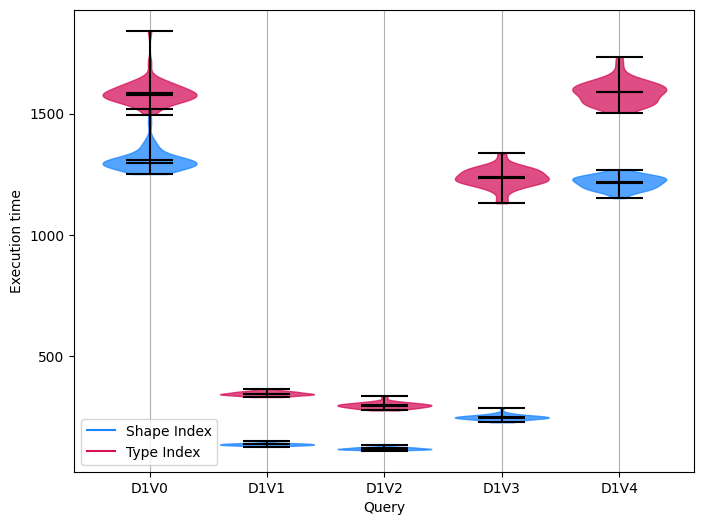

In [38]:
queryName ="queries/parsed/interactive-discover-1.sparql.json"
plotOneQueryExecutionTime(queryName, "D1")

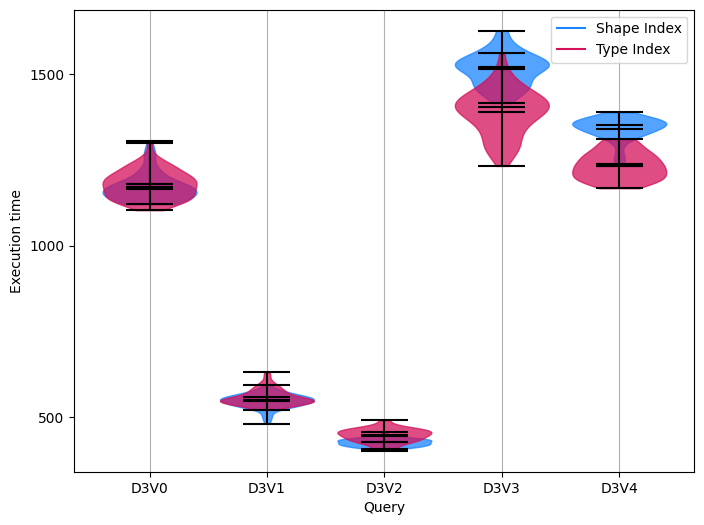

In [39]:
queryName ="queries/parsed/interactive-discover-3.sparql.json"
plotOneQueryExecutionTime(queryName,"D3")

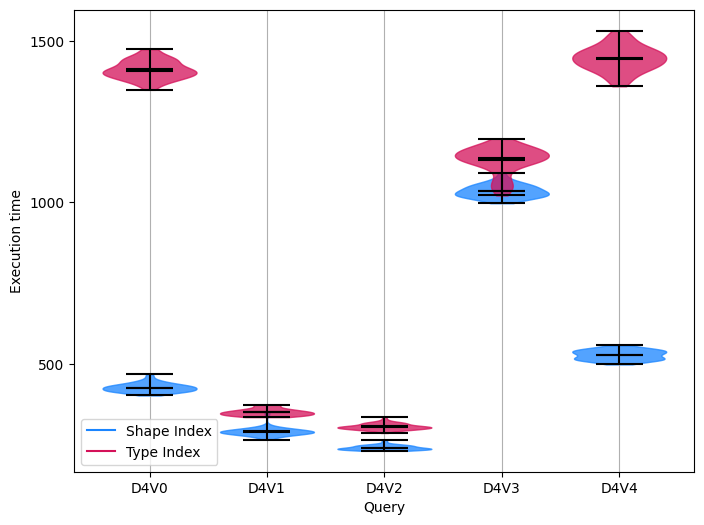

In [40]:
queryName ="queries/parsed/interactive-discover-4.sparql.json"
plotOneQueryExecutionTime(queryName, "D4")

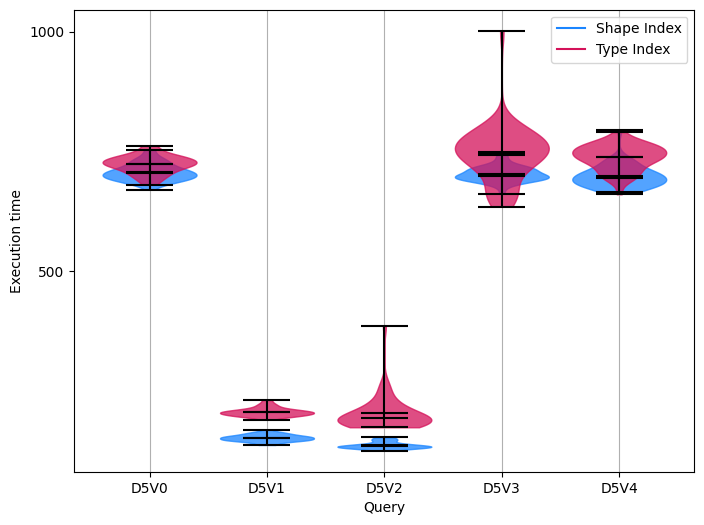

In [41]:
queryName ="queries/parsed/interactive-discover-5.sparql.json"
plotOneQueryExecutionTime(queryName, "D5")

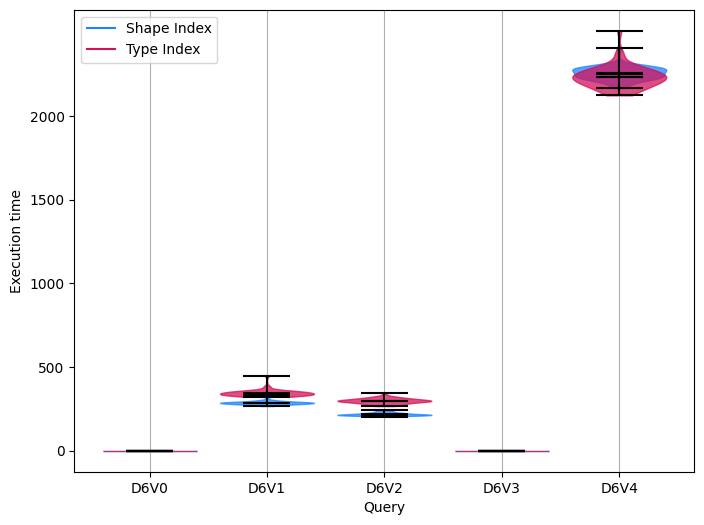

In [42]:
queryName ="queries/parsed/interactive-discover-6.sparql.json"
plotOneQueryExecutionTime(queryName, "D6")

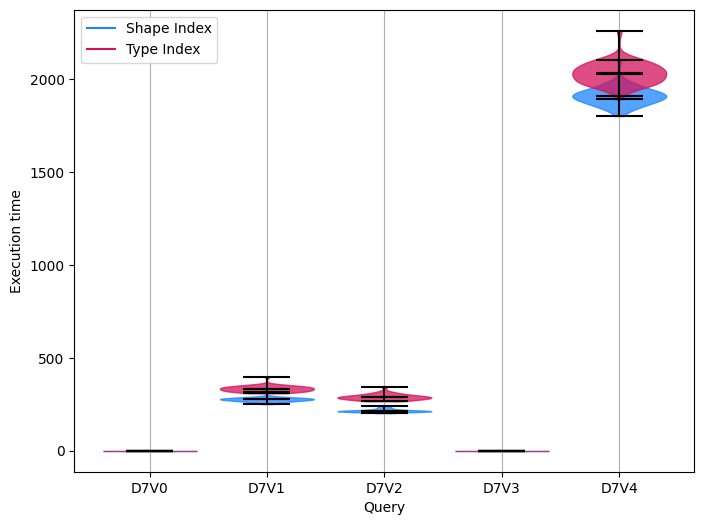

In [43]:
queryName ="queries/parsed/interactive-discover-7.sparql.json"
plotOneQueryExecutionTime(queryName, "D7")

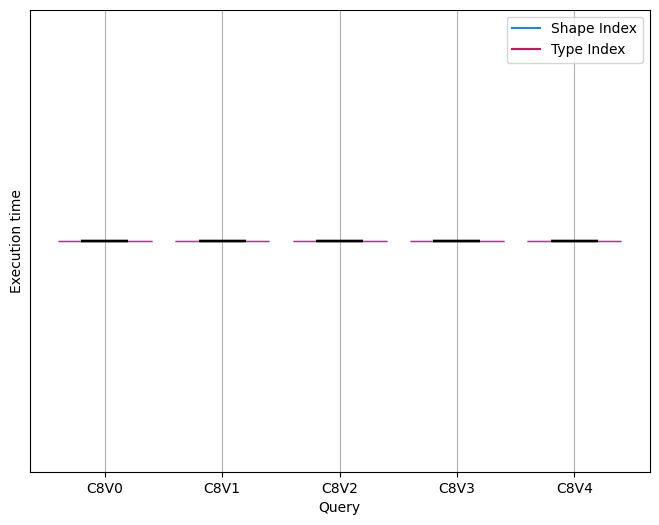

In [44]:
queryName ="queries/parsed/interactive-complex-8.sparql.json"
plotOneQueryExecutionTime(queryName, "C8")

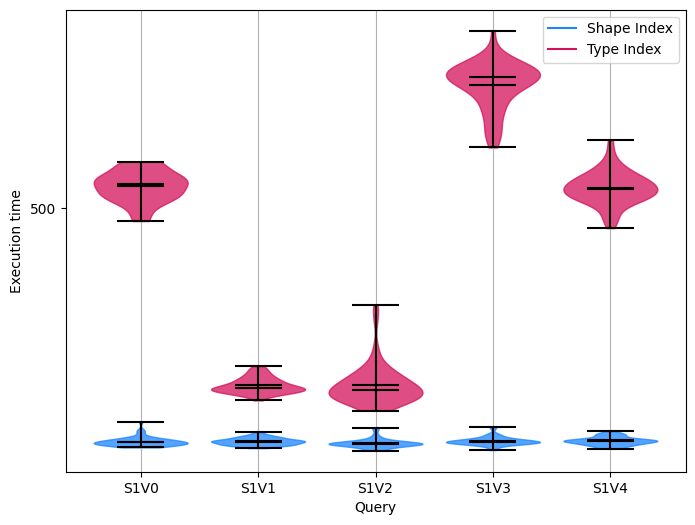

In [45]:
queryName ="queries/parsed/interactive-short-1.sparql.json"
plotOneQueryExecutionTime(queryName, "S1")

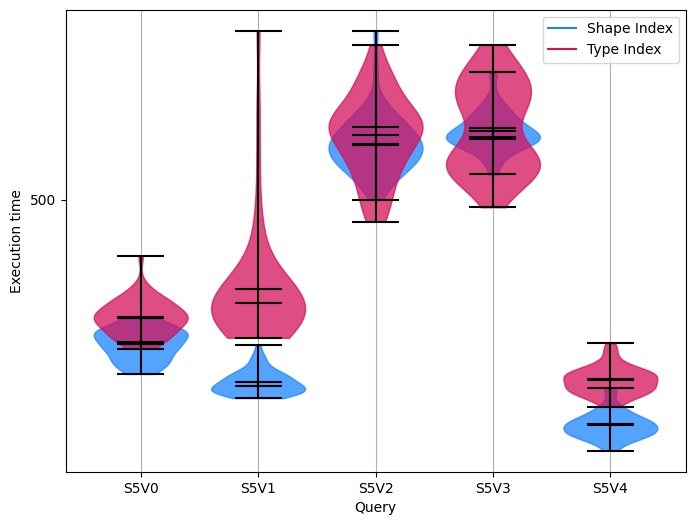

In [46]:
queryName ="queries/parsed/interactive-short-5.sparql.json"
plotOneQueryExecutionTime(queryName, "S5")

In [20]:
def appendPlot(ax, query, indexes):
    
    allDataShapeIndex = [data for label,data in executionTimeShapeIndex[query].items()]
    allDataTypeIndex  = [data for label,data in executionTimeTypeIndex[query].items()]
    
    partsShapeIndex = ax.violinplot(allDataShapeIndex, indexes, widths=width, showmeans=True, showmedians=True)
    partsTypeIndex = ax.violinplot(allDataTypeIndex, indexes, widths=width, showmeans=True, showmedians=True)
    
    colorViolon(partsShapeIndex,'#1A85FF')
    colorViolon(partsTypeIndex,'#D41159')

### Demo

[0.   1.25 2.5  3.75 5.  ]


Text(0, 0.5, 'Execution time')

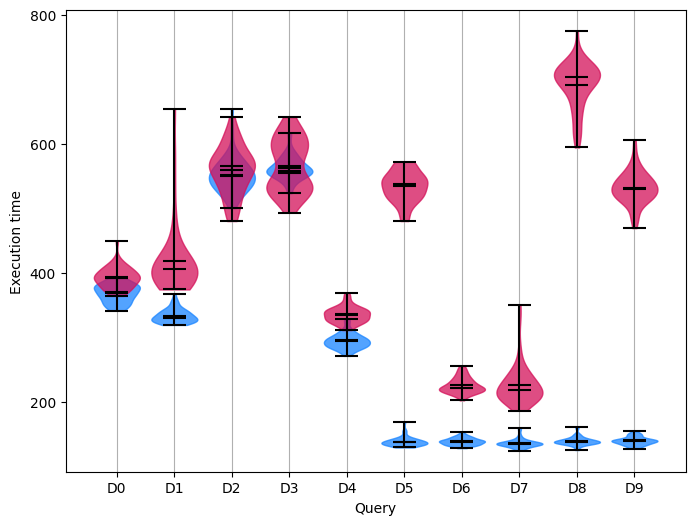

In [21]:
queryNameShort5 ="queries/parsed/interactive-short-5.sparql.json"

allDataShapeIndexShort5 = [data for label,data in executionTimeShapeIndex[queryNameShort5].items()]
allDataTypeIndexShort5  = [data for label,data in executionTimeTypeIndex[queryNameShort5].items()]


queryNameShort1 ="queries/parsed/interactive-short-1.sparql.json"

allDataShapeIndexShort1 = [data for label,data in executionTimeShapeIndex[queryNameShort1].items()]
allDataTypeIndexShort1 = [data for label,data in executionTimeTypeIndex[queryNameShort1].items()]


width = 1
tempindexes = np.linspace(0, 5, 5)
print(tempindexes)
yaxisIndexes = np.arange(0, 2500, 200)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yticks(yaxisIndexes)

xticks = [1.25*i for i in range(0,10)]
ax.set_xticks(xticks)
ax.set_xticklabels(["D{}".format(i,i) for i,v in enumerate(xticks)])
ax.grid(axis="x")



partsShapeIndex = ax.violinplot(allDataShapeIndexShort5, tempindexes, widths=width, showmeans=True, showmedians=True)
partsTypeIndex = ax.violinplot(allDataTypeIndexShort5, tempindexes, widths=width, showmeans=True, showmedians=True)
colorViolon(partsShapeIndex,'#1A85FF')
colorViolon(partsTypeIndex,'#D41159')

partsShapeIndex = ax.violinplot(allDataShapeIndexShort1, tempindexes+tempindexes[-1]+1.25, widths=width, showmeans=True, showmedians=True)
partsTypeIndex = ax.violinplot(allDataTypeIndexShort1, tempindexes+tempindexes[-1]+1.25, widths=width, showmeans=True, showmedians=True)
colorViolon(partsShapeIndex,'#1A85FF')
colorViolon(partsTypeIndex,'#D41159')

ax.set_xlabel("Query")
ax.set_ylabel("Execution time")

## All queries

### Plots

In [22]:
queries = [
    ["queries/parsed/interactive-short-1.sparql.json", "S1V"],
    ["queries/parsed/interactive-short-5.sparql.json", "S5V"],
    
    ["queries/parsed/interactive-discover-1.sparql.json", "D1V"],
    ["queries/parsed/interactive-discover-3.sparql.json", "D3V"],
    ["queries/parsed/interactive-discover-4.sparql.json", "D4V"],
    ["queries/parsed/interactive-discover-5.sparql.json", "D5V"],
    ["queries/parsed/interactive-discover-7.sparql.json", "D7V"],

    #["queries/parsed/interactive-complex-8.sparql.json", "C8V"],
]

queriesBetterPerformance = [
    ["queries/parsed/interactive-short-1.sparql.json", "S1V"],
    #["queries/parsed/interactive-short-5.sparql.json", "S5V"],
    
    ["queries/parsed/interactive-discover-1.sparql.json", "D1V"],
    #["queries/parsed/interactive-discover-3.sparql.json", "D3V"],
    ["queries/parsed/interactive-discover-4.sparql.json", "D4V"],
    ["queries/parsed/interactive-discover-5.sparql.json", "D5V"],
    ["queries/parsed/interactive-discover-7.sparql.json", "D7V"],

    #["queries/parsed/interactive-complex-8.sparql.json", "C8V"],
]

queriesSimilarPerformance = [
    #["queries/parsed/interactive-short-1.sparql.json", "S1V"],
    ["queries/parsed/interactive-short-5.sparql.json", "S5V"],
    
    #["queries/parsed/interactive-discover-1.sparql.json", "D1V"],
    ["queries/parsed/interactive-discover-3.sparql.json", "D3V"],
    #["queries/parsed/interactive-discover-4.sparql.json", "D4V"],
    #["queries/parsed/interactive-discover-5.sparql.json", "D5V"],
    #["queries/parsed/interactive-discover-7.sparql.json", "D7V"],

    #["queries/parsed/interactive-complex-8.sparql.json", "C8V"],
]

True

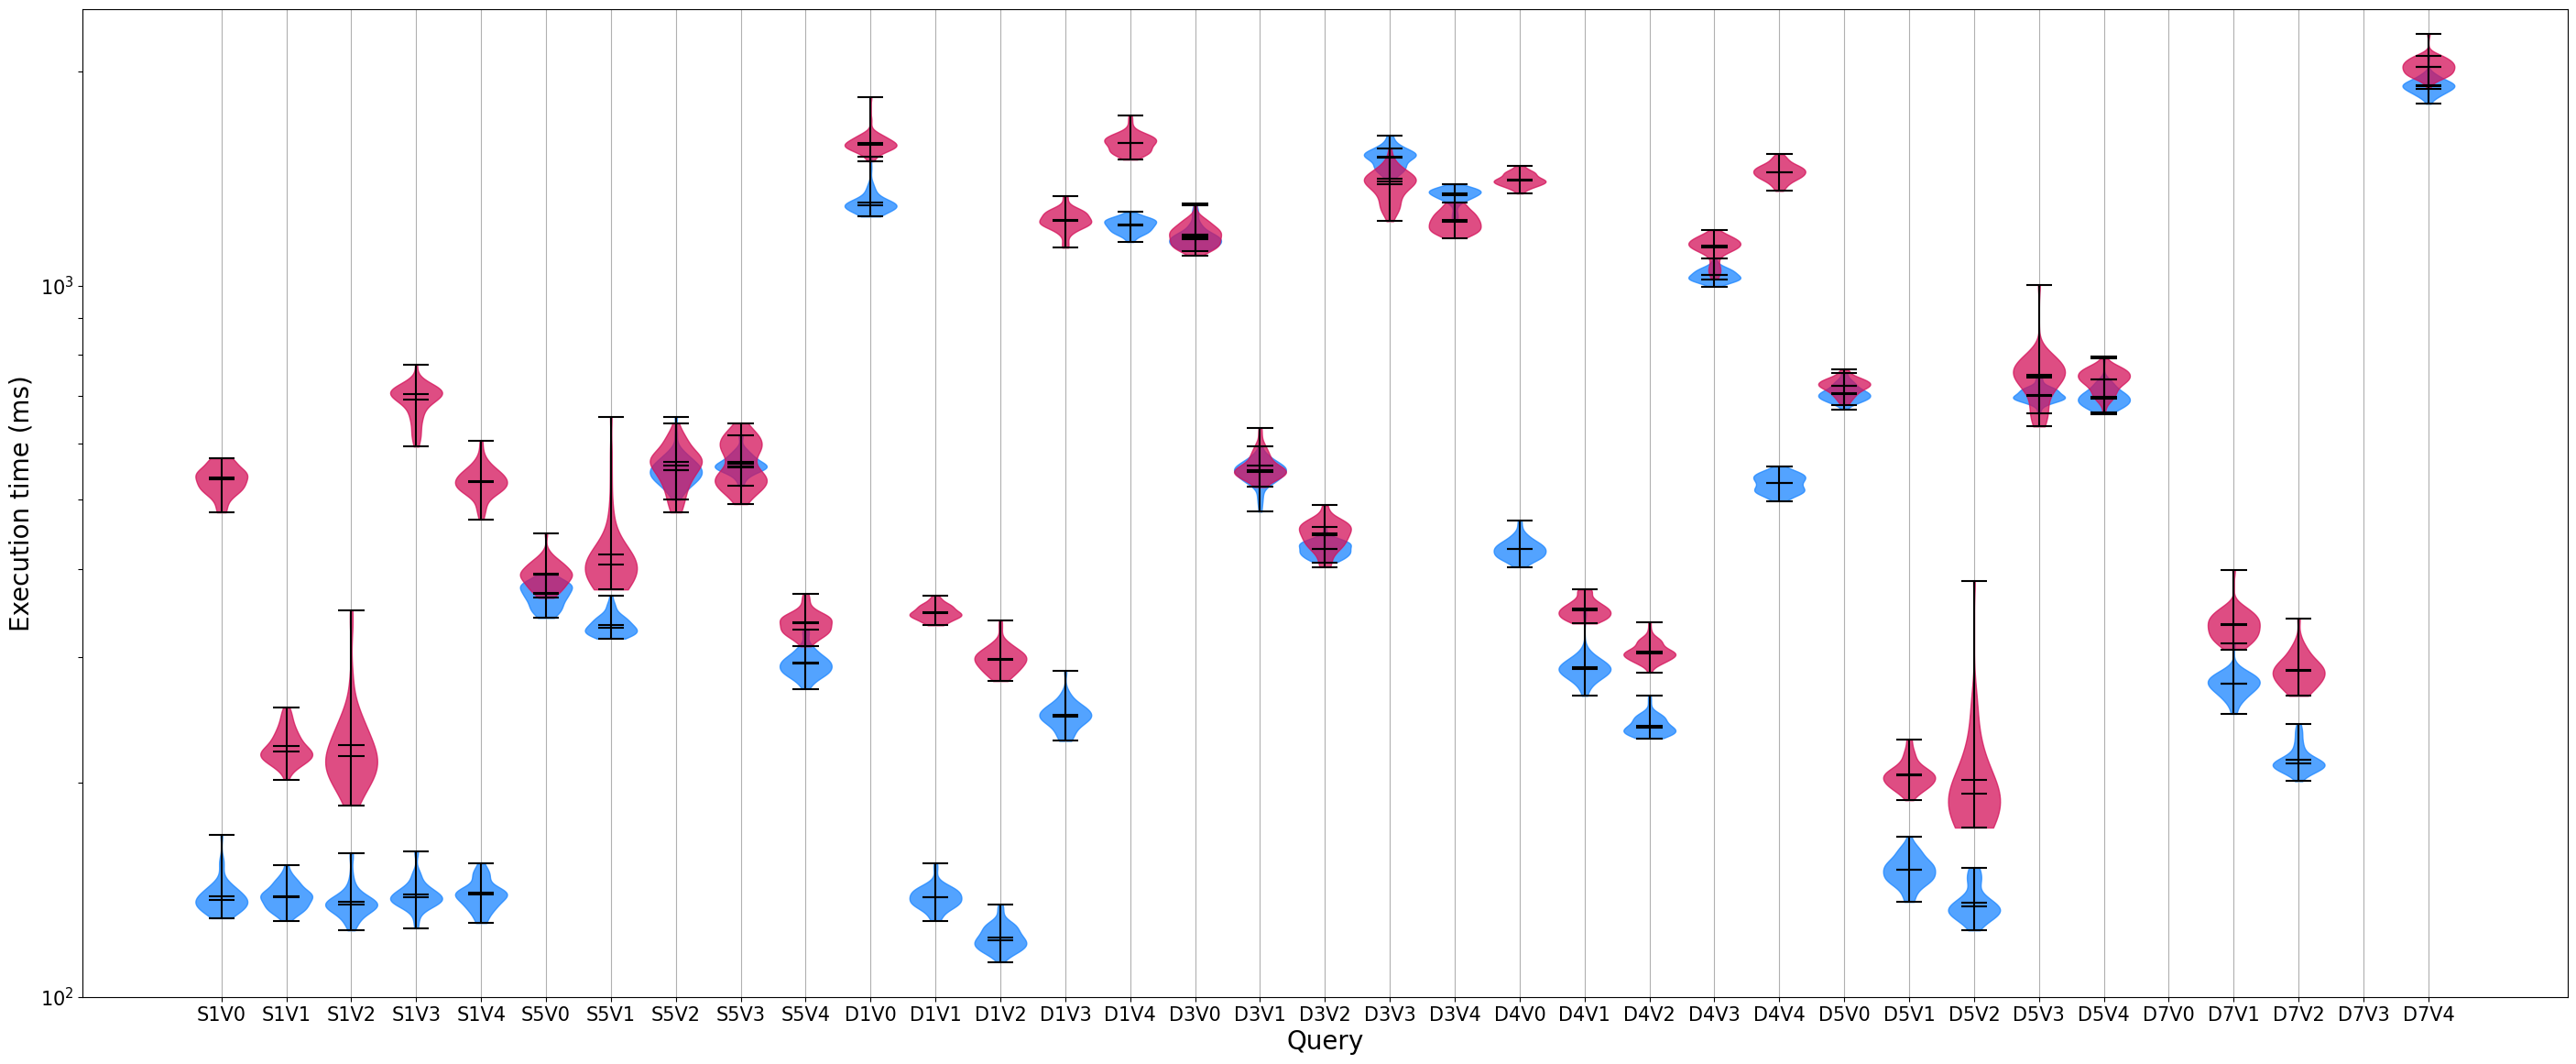

In [23]:
yaxisIndexes = np.arange(50, 2500, 200)
fig, ax = plt.subplots()
ratio = 6/15
number = 35
fig.set_size_inches(number, number*ratio)
ax.set_yticks(yaxisIndexes)
ax.set_ylim(bottom=100)
ax.set_yscale('log', base=10)

xticks = [1.25*i for i in range(0,5*len(queries))]
ax.set_xticks(xticks)
xtickLabel = []
for _,label in queries:
    xtickLabel+= ["{}{}".format(label, i) for i in range(0,5)]
ax.set_xticklabels(xtickLabel, fontsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=[1, 2, 3, 4, 5, 6, 7, 8, 9], numticks=10))
ax.yaxis.set_minor_formatter(LogFormatter(base=10, labelOnlyBase=False))

ax.set_xlabel("Query", fontsize=20)
ax.set_ylabel("Execution time (ms)", fontsize=20)
ax.grid(axis="x")

indexes =  np.linspace(0, 5, 5)
initialIndex = np.linspace(0, 5, 5)
for query,_ in queries:
    appendPlot(ax, query, indexes)
    indexes = np.arange(indexes[-1]+1.25, indexes[-1]+6.25+0.1, 1.25)
True

True

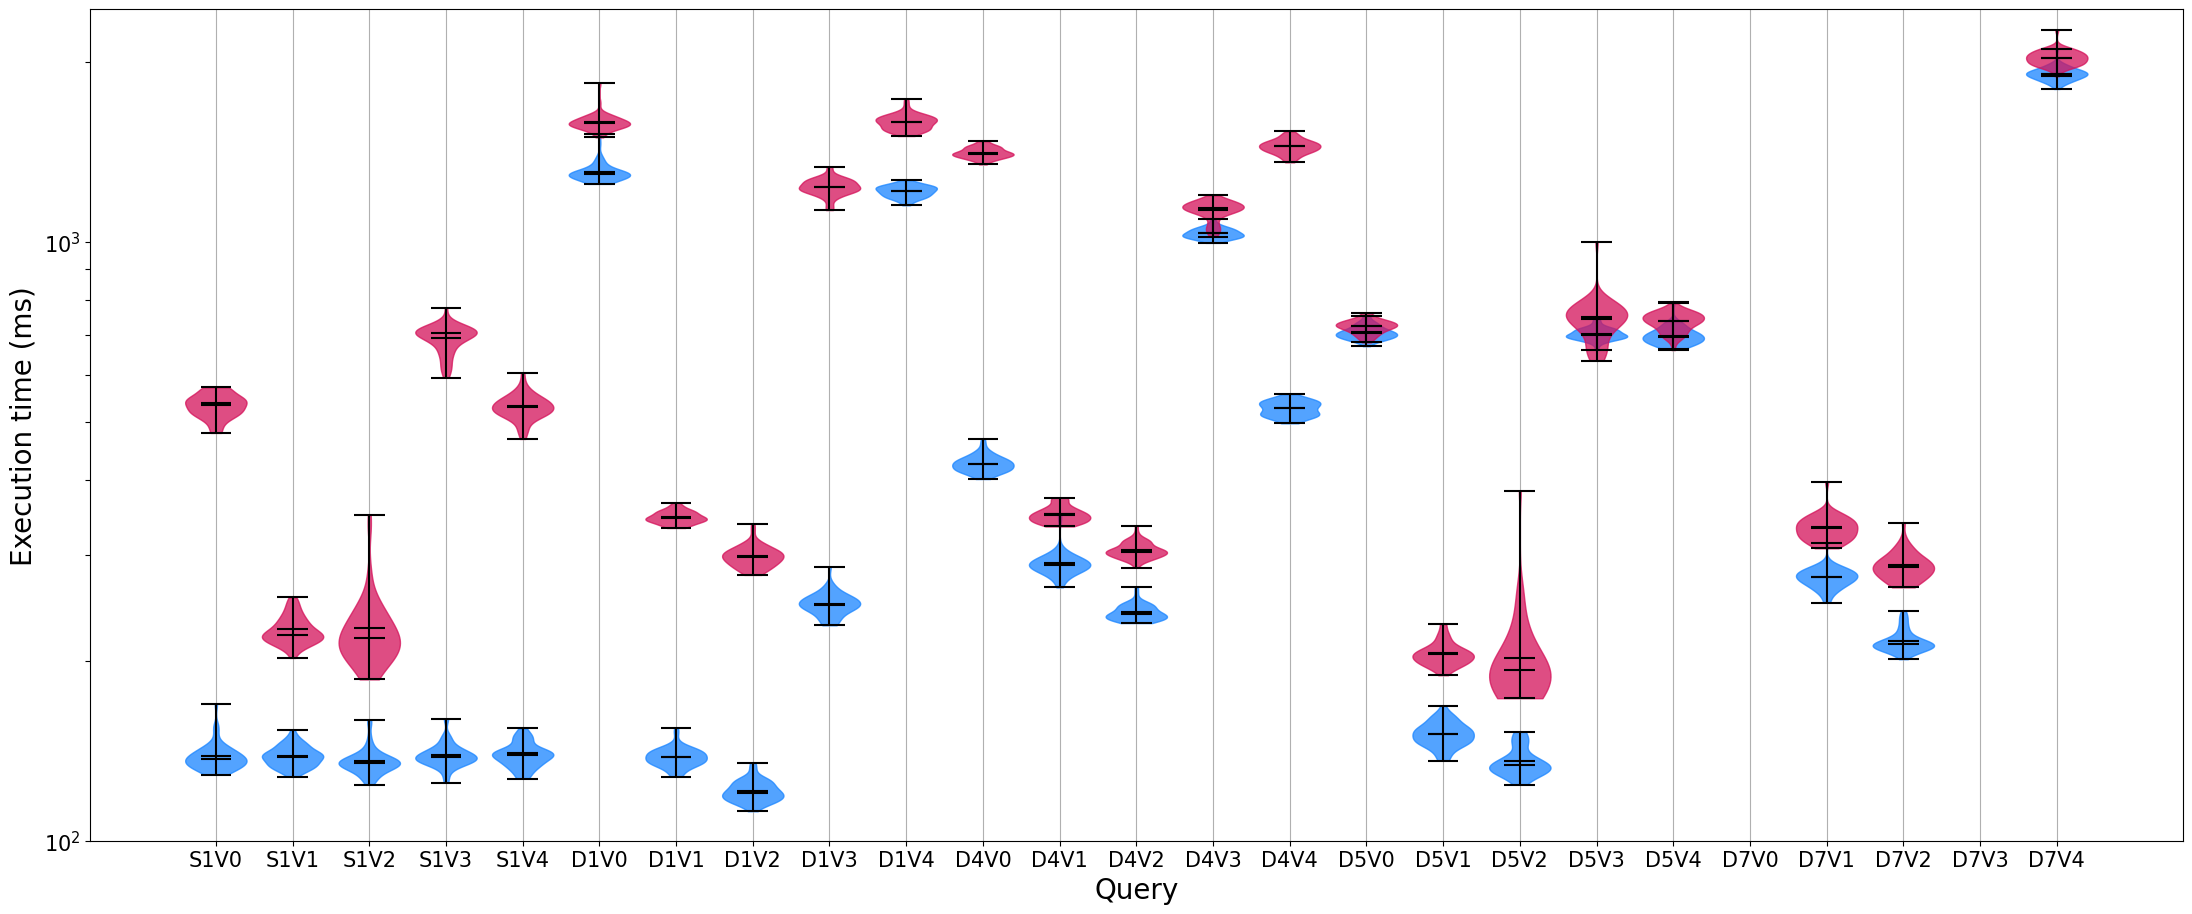

In [24]:
yaxisIndexes = np.arange(50, 2500, 200)
fig, ax = plt.subplots()
ratio = 6/15
number = 27
fig.set_size_inches(number, number*ratio)
ax.set_yticks(yaxisIndexes)
ax.set_ylim(bottom=100)
ax.set_yscale('log', base=10)

xticks = [1.25*i for i in range(0,5*len(queriesBetterPerformance))]
ax.set_xticks(xticks)
xtickLabel = []
for _,label in queriesBetterPerformance:
    xtickLabel+= ["{}{}".format(label, i) for i in range(0,5)]
ax.set_xticklabels(xtickLabel, fontsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=[1, 2, 3, 4, 5, 6, 7, 8, 9], numticks=10))
ax.yaxis.set_minor_formatter(LogFormatter(base=10, labelOnlyBase=False))

ax.set_xlabel("Query", fontsize=20)
ax.set_ylabel("Execution time (ms)", fontsize=20)
ax.grid(axis="x")

indexes =  np.linspace(0, 5, 5)
initialIndex = np.linspace(0, 5, 5)
for query,_ in queriesBetterPerformance:
    appendPlot(ax, query, indexes)
    indexes = np.arange(indexes[-1]+1.25, indexes[-1]+6.25+0.1, 1.25)
True

True

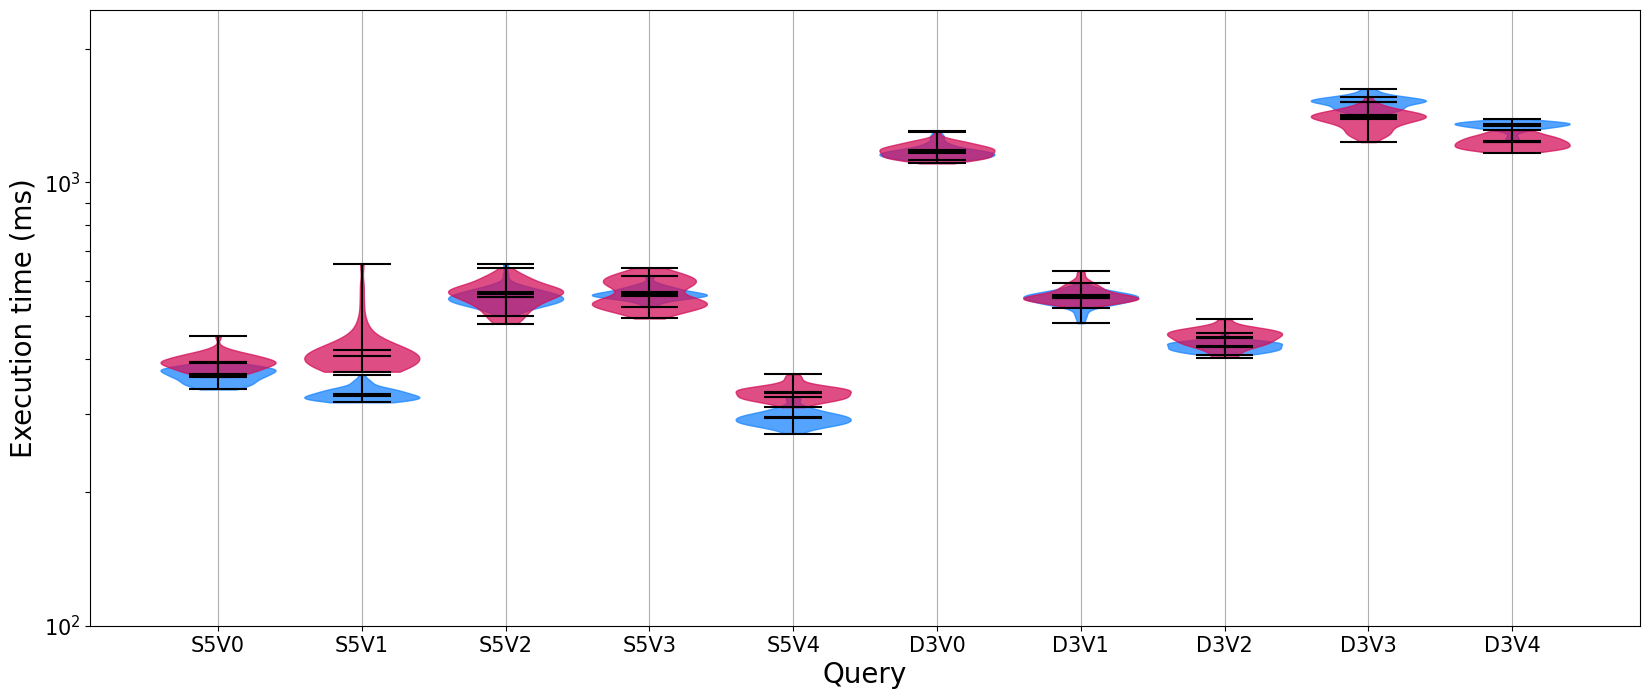

In [25]:
yaxisIndexes = np.arange(50, 2500, 200)
fig, ax = plt.subplots()
ratio = 6/15
number = 20
fig.set_size_inches(number, number*ratio)
ax.set_yticks(yaxisIndexes)
ax.set_ylim(bottom=100)
ax.set_yscale('log', base=10)

xticks = [1.25*i for i in range(0,5*len(queriesSimilarPerformance))]
ax.set_xticks(xticks)
xtickLabel = []
for _,label in queriesSimilarPerformance:
    xtickLabel+= ["{}{}".format(label, i) for i in range(0,5)]
ax.set_xticklabels(xtickLabel, fontsize=15)
ax.tick_params(axis='y', labelsize=15)

ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=[1, 2, 3, 4, 5, 6, 7, 8, 9], numticks=10))
ax.yaxis.set_minor_formatter(LogFormatter(base=10, labelOnlyBase=False))

ax.set_xlabel("Query", fontsize=20)
ax.set_ylabel("Execution time (ms)", fontsize=20)
ax.grid(axis="x")

indexes =  np.linspace(0, 5, 5)
initialIndex = np.linspace(0, 5, 5)
for query,_ in queriesSimilarPerformance:
    appendPlot(ax, query, indexes)
    indexes = np.arange(indexes[-1]+1.25, indexes[-1]+6.25+0.1, 1.25)
True

# Number of HTTP Request

## Util

In [59]:
def plotOneQueryExecutionTime(queryName, queryLabelTemplate):
    indexes = np.arange(0, 5, 1)
    yaxisIndexes = np.arange(0, 200, 500)
    width = 0.25
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained')
    colors = ["#1A85FF", "#D41159"]
    labels = ["Shape Index", "Type Index"]
    
    for i, value in enumerate([numberHttpRequestShapeIndex[queryName], numberHttpRequestTypeIndex[queryName]]):
        offset = width * multiplier
        rects = ax.bar(indexes + offset, value, width, color=colors[i], label=labels[i])
        ax.bar_label(rects, padding=3)
        multiplier += 1
        
    ax.set_xticks(indexes)
    ax.set_xticklabels(["{}V{}".format(queryLabelTemplate,i) for i,v in enumerate(indexes)])
    ax.set_xlabel("Query")
    ax.set_ylabel("Execution time")
    ax.set_ylim(0)
    ax.legend()

## Single plot

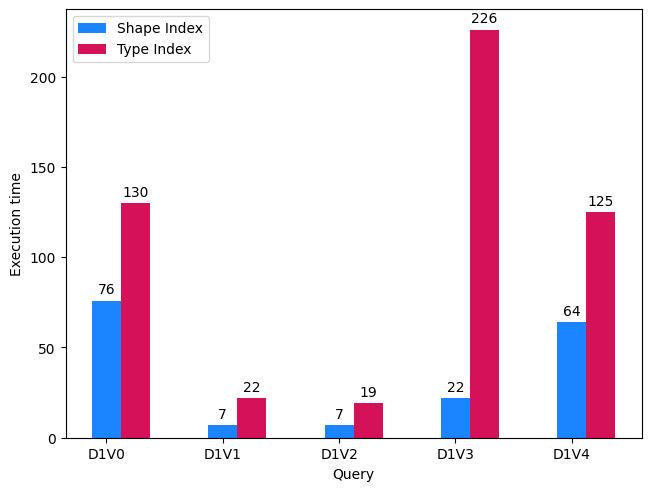

In [60]:
queryName ="queries/parsed/interactive-discover-1.sparql.json"
plotOneQueryExecutionTime(queryName, "D1")

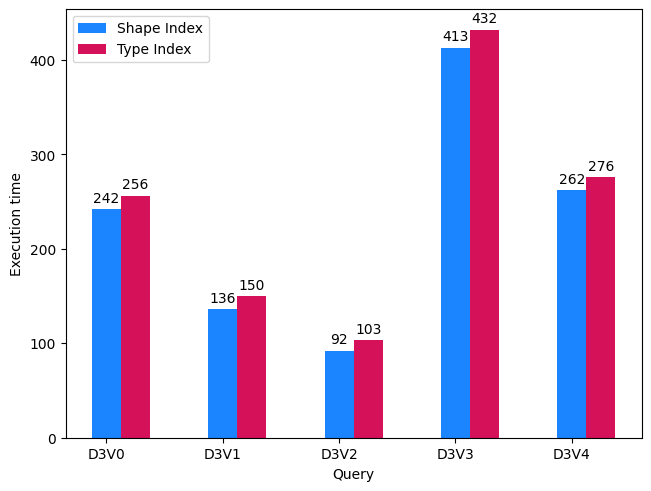

In [61]:
queryName ="queries/parsed/interactive-discover-3.sparql.json"
plotOneQueryExecutionTime(queryName, "D3")

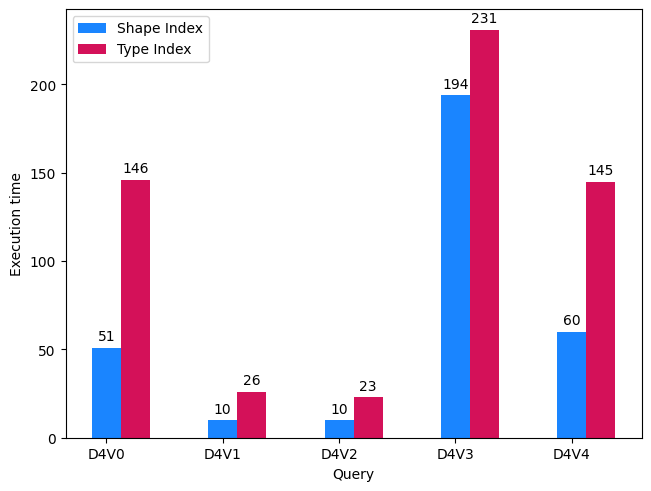

In [62]:
queryName ="queries/parsed/interactive-discover-4.sparql.json"
plotOneQueryExecutionTime(queryName, "D4")

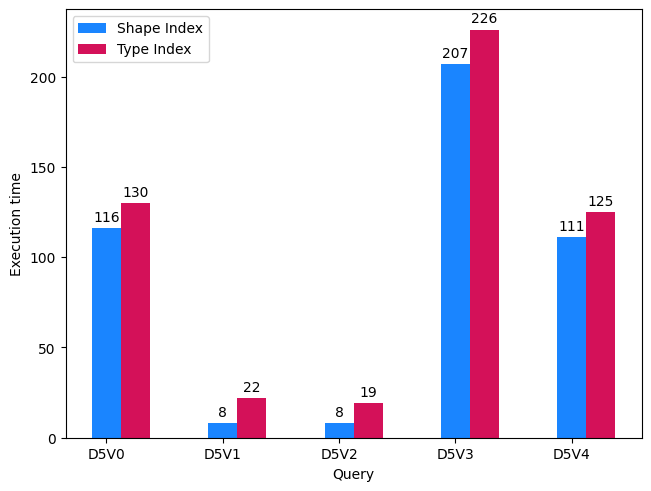

In [63]:
queryName ="queries/parsed/interactive-discover-5.sparql.json"
plotOneQueryExecutionTime(queryName, "D5")

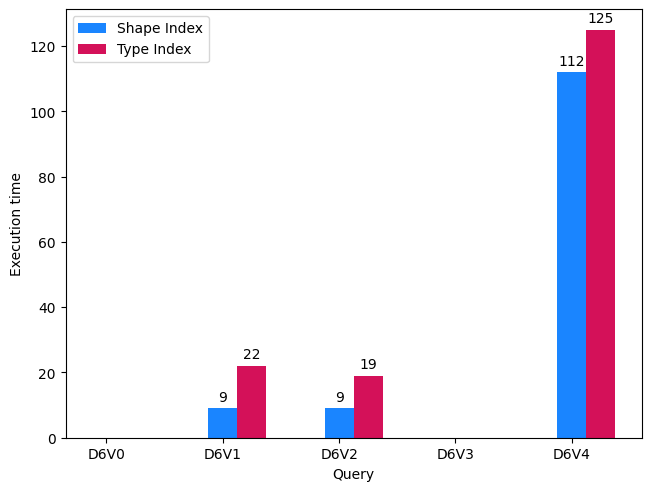

In [64]:
queryName ="queries/parsed/interactive-discover-6.sparql.json"
plotOneQueryExecutionTime(queryName, "D6")

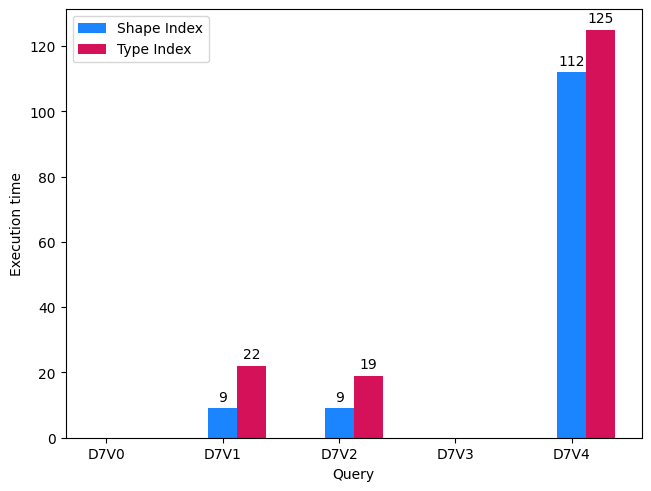

In [65]:
queryName ="queries/parsed/interactive-discover-7.sparql.json"
plotOneQueryExecutionTime(queryName, "D7")

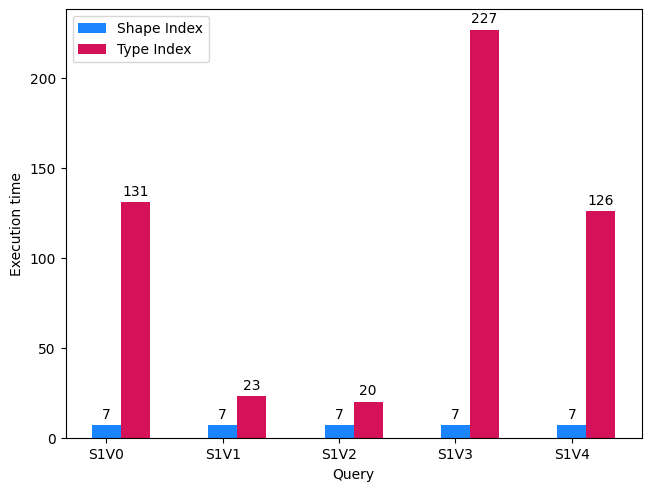

In [66]:
queryName ="queries/parsed/interactive-short-1.sparql.json"
plotOneQueryExecutionTime(queryName, "S1")

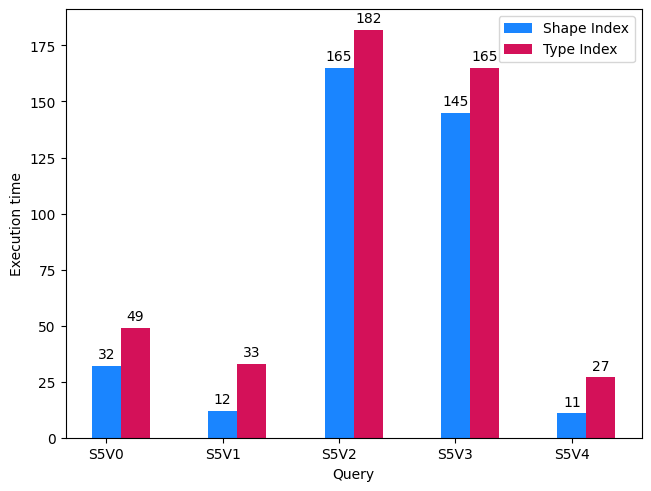

In [67]:
queryName ="queries/parsed/interactive-short-5.sparql.json"
plotOneQueryExecutionTime(queryName, "S5")